# Adiabatic Flame Example

Illustrating a one-dimensional cantera simulation using the `ctwrap` package using the `adiabatic_flame` module.

In [1]:
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


## 1. Function/Class Definitions

In [2]:
import cantera as ct
import ctwrap as cw

## 2. Simulations

### 2.1 Create Simulation Object

Uses a module in the `modules` folder. Modules do not have to depend on `ctwrap`.

In [3]:
sim = cw.Simulation.from_module(cw.modules.adiabatic_flame)
sim

In [4]:
%%time
sim.run()

    defaults: mixture-averaged flamespeed = 0.711265 m/s
    defaults: multi-component flamespeed  = 0.727009 m/s
CPU times: user 500 ms, sys: 25.1 ms, total: 525 ms
Wall time: 537 ms


### 2.2 Create Simulation Handler

In [5]:
s = cw.SimulationHandler.from_yaml('adiabatic_flame.yaml', verbosity=1)
s

Simulations for entry `upstream.phi` with values: [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6]


In [6]:
s.tasks

{'upstream.phi_0.4': 0.4,
 'upstream.phi_0.6': 0.6,
 'upstream.phi_0.8': 0.8,
 'upstream.phi_1.0': 1.0,
 'upstream.phi_1.2': 1.2,
 'upstream.phi_1.4': 1.4,
 'upstream.phi_1.6': 1.6,
 'upstream.phi_1.8': 1.8,
 'upstream.phi_2.0': 2.0,
 'upstream.phi_2.2': 2.2,
 'upstream.phi_2.4': 2.4,
 'upstream.phi_2.6': 2.6}

In [7]:
s.configuration('upstream.phi_0.4')

{'upstream': {'T': [300.0, 'kelvin', 'temperature'],
  'P': [1.0, 'atmosphere', 'pressure'],
  'phi': [0.4, 'dimensionless', 'equivalence ratio'],
  'fuel': 'H2',
  'oxidizer': 'O2:1,AR:5'},
 'chemistry': {'mechanism': 'h2o2.xml'},
 'domain': {'width': [30, 'millimeter', 'domain width']}}

### 2.3 Run Tasks in Series

In [8]:
%%time
s.run_serial(sim, verbosity=1, loglevel=0)

 * processing `upstream.phi_0.4`
    upstream.phi_0.4: mixture-averaged flamespeed = 0.201058 m/s
    upstream.phi_0.4: multi-component flamespeed  = 0.215256 m/s
 * processing `upstream.phi_0.6`
    upstream.phi_0.6: mixture-averaged flamespeed = 0.924047 m/s
    upstream.phi_0.6: multi-component flamespeed  = 0.934704 m/s
 * processing `upstream.phi_0.8`
    upstream.phi_0.8: mixture-averaged flamespeed = 1.735133 m/s
    upstream.phi_0.8: multi-component flamespeed  = 1.720514 m/s
 * processing `upstream.phi_1.0`
    upstream.phi_1.0: mixture-averaged flamespeed = 2.322010 m/s
    upstream.phi_1.0: multi-component flamespeed  = 2.289856 m/s
 * processing `upstream.phi_1.2`
    upstream.phi_1.2: mixture-averaged flamespeed = 2.716045 m/s
    upstream.phi_1.2: multi-component flamespeed  = 2.671883 m/s
 * processing `upstream.phi_1.4`
    upstream.phi_1.4: mixture-averaged flamespeed = 2.951101 m/s
    upstream.phi_1.4: multi-component flamespeed  = 2.899580 m/s
 * processing `upstrea

True

### 2.4 Run Tasks in Parallel

In [9]:
%%time
s.run_parallel(sim, verbosity=0)

    upstream.phi_0.6: mixture-averaged flamespeed = 0.924047 m/s
    upstream.phi_0.8: mixture-averaged flamespeed = 1.735133 m/s
    upstream.phi_0.6: multi-component flamespeed  = 0.934704 m/s
    upstream.phi_0.8: multi-component flamespeed  = 1.720514 m/s
    upstream.phi_1.0: mixture-averaged flamespeed = 2.322010 m/s
    upstream.phi_1.8: mixture-averaged flamespeed = 3.045410 m/s
    upstream.phi_1.2: mixture-averaged flamespeed = 2.716045 m/s
    upstream.phi_1.4: mixture-averaged flamespeed = 2.951101 m/s
    upstream.phi_1.0: multi-component flamespeed  = 2.289856 m/s
    upstream.phi_1.2: multi-component flamespeed  = 2.671883 m/s
    upstream.phi_1.8: multi-component flamespeed  = 2.992115 m/s
    upstream.phi_1.6: mixture-averaged flamespeed = 3.051486 m/s
    upstream.phi_1.4: multi-component flamespeed  = 2.899580 m/s
    upstream.phi_0.4: mixture-averaged flamespeed = 0.201058 m/s
    upstream.phi_1.6: multi-component flamespeed  = 2.997080 m/s
    upstream.phi_0.4: mul

True

## 3. Create Graphical Output

In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl

col = mpl.rcParams['axes.prop_cycle'].by_key()['color']
n_col = len(col)

### 3.1 Load Data

In [11]:
# load data from output file
data = cw.fileio.from_hdf(s.oname)
data.keys()

dict_keys(['defaults', 'upstream.phi_0.4<mix>', 'upstream.phi_0.4<multi>', 'upstream.phi_0.6<mix>', 'upstream.phi_0.6<multi>', 'upstream.phi_0.8<mix>', 'upstream.phi_0.8<multi>', 'upstream.phi_1.0<mix>', 'upstream.phi_1.0<multi>', 'upstream.phi_1.2<mix>', 'upstream.phi_1.2<multi>', 'upstream.phi_1.4<mix>', 'upstream.phi_1.4<multi>', 'upstream.phi_1.6<mix>', 'upstream.phi_1.6<multi>', 'upstream.phi_1.8<mix>', 'upstream.phi_1.8<multi>', 'upstream.phi_2.0<mix>', 'upstream.phi_2.0<multi>', 'upstream.phi_2.2<mix>', 'upstream.phi_2.2<multi>', 'upstream.phi_2.4<mix>', 'upstream.phi_2.4<multi>', 'upstream.phi_2.6<mix>', 'upstream.phi_2.6<multi>', 'variation'])

In [12]:
mix = {k.split('<')[0]: data[k] for k in data if 'mix' in k}
mlt = {k.split('<')[0]: data[k] for k in data if 'multi' in k}

tasks = data.get('variation')['tasks']
phi = data.get('variation')['values']
tasks, phi

(['upstream.phi_0.4',
  'upstream.phi_0.6',
  'upstream.phi_0.8',
  'upstream.phi_1.0',
  'upstream.phi_1.2',
  'upstream.phi_1.4',
  'upstream.phi_1.6',
  'upstream.phi_1.8',
  'upstream.phi_2.0',
  'upstream.phi_2.2',
  'upstream.phi_2.4',
  'upstream.phi_2.6'],
 [0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6])

In [13]:
up = data.get('defaults')['upstream']
up

{'P': [1.0, 'atmosphere', 'pressure'],
 'T': [300.0, 'kelvin', 'temperature'],
 'fuel': 'H2',
 'oxidizer': 'O2:1,AR:5',
 'phi': [0.55, 'dimensionless', 'equivalence ratio']}

### 3.2 Plot

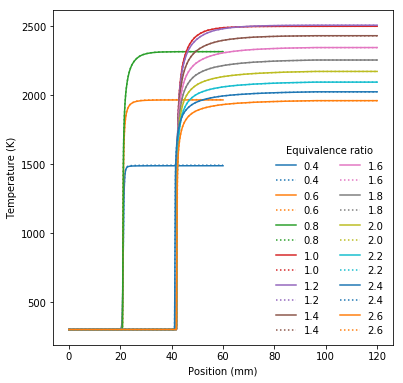

In [14]:
# create figure and adjust size/spacing
fig, ax = plt.subplots(1) #
fig.set_size_inches(6.,6.,forward=True)
fig.subplots_adjust(hspace=0,bottom=.125,top=.9,left=.17,right=.955)

# plot results
for i, key in enumerate(tasks):
    df = mix[key]
    label = key.split('_')[1]
    ax.plot(1000*df['z (m)'], df['T (K)'], color=col[i % n_col], 
            linestyle='-', label=label) 
    df = mlt[key]
    ax.plot(1000*df['z (m)'], df['T (K)'], color=col[i % n_col], 
            linestyle=':', label=label) 

# add title/axis labels
ax.set_xlabel('Position (mm)')
ax.set_ylabel('Temperature (K)')

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Equivalence ratio', ncol=2) # % mech)
_ = leg.draw_frame(False) 

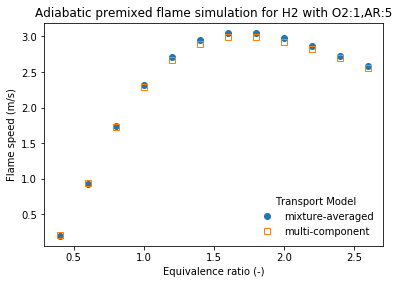

In [15]:
# create figure and adjust size/spacing
fig, ax = plt.subplots(1) #
fig.set_size_inches(6.,4.,forward=True)
fig.subplots_adjust(hspace=0,bottom=.125,top=.9,left=.17,right=.955)

# plot results
u_mix = [ mix[t]['u (m/s)'][0] for t in tasks]
u_mlt = [ mlt[t]['u (m/s)'][0] for t in tasks]

ax.plot(phi, u_mix, marker='o', 
            linestyle='none', label='mixture-averaged') 
ax.plot(phi, u_mlt, marker='s', 
            markerfacecolor='none',
            linestyle='none', label='multi-component') 

# add title/axis labels
ax.set_xlabel('Equivalence ratio (-)')
ax.set_ylabel('Flame speed (m/s)')

ax.set_title('Adiabatic premixed flame simulation for {} with {}'.format(up['fuel'],up['oxidizer']))

# add legend
leg = ax.legend(loc='lower right',#prop={'size':11},
                title='Transport Model') # % mech)
_ = leg.draw_frame(False) 